# Company Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
Data=pd.read_csv('Company_data.csv')
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
Data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data=pd.get_dummies(Data, columns=['ShelveLoc','Urban','US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [6]:
data['Sales'] = pd.cut(data['Sales'], bins=3, labels=['Low', 'Medium', 'High'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Medium,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,High,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Medium,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Medium,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Medium,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Medium,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Medium,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Sales             400 non-null    category
 1   CompPrice         400 non-null    int64   
 2   Income            400 non-null    int64   
 3   Advertising       400 non-null    int64   
 4   Population        400 non-null    int64   
 5   Price             400 non-null    int64   
 6   Age               400 non-null    int64   
 7   Education         400 non-null    int64   
 8   ShelveLoc_Bad     400 non-null    uint8   
 9   ShelveLoc_Good    400 non-null    uint8   
 10  ShelveLoc_Medium  400 non-null    uint8   
 11  Urban_No          400 non-null    uint8   
 12  Urban_Yes         400 non-null    uint8   
 13  US_No             400 non-null    uint8   
 14  US_Yes            400 non-null    uint8   
dtypes: category(1), int64(7), uint8(7)
memory usage: 25.3 KB


In [8]:
X=data.iloc[:,1:]
Y=data['Sales']

In [9]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
Y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)   
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

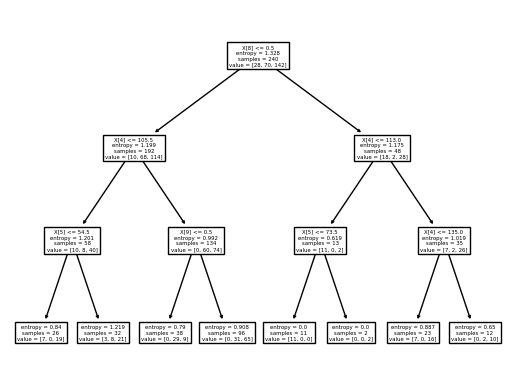

In [13]:
plot_tree(model)
plt.show()

In [14]:
preds=model.predict(x_test)
preds

array(['Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'Low', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'High', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium'

In [15]:
pd.DataFrame({'Actual' : y_test,
             'Predicted' : preds})

,Actual,Predicted
209,Low,Medium
280,Low,Low
33,Medium,Medium
210,Low,Low
93,Medium,Medium
...,...,...
192,Medium,Medium
103,Low,Medium
81,Medium,Medium
316,High,High


In [16]:
pd.crosstab(y_test,preds)

col_0,High,Low,Medium
Sales,,,
Low,0,15,17
Medium,7,8,90
High,12,0,11


In [17]:
np.mean(preds == y_test)

0.73125


# Fraud check dataset

In [18]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [19]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [20]:
fraud['Taxable.Income'] = pd.to_numeric(fraud['Taxable.Income'], errors='coerce')

In [21]:
fraud['Taxable.Income'] = fraud['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [22]:
fraud = pd.get_dummies(fraud, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)
fraud



,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,Good,39492,7,1,0,0,1
596,Good,55369,2,1,0,0,1
597,Good,154058,0,0,0,0,1
598,Good,180083,17,1,1,0,0


In [23]:
fraud['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Taxable.Income          600 non-null    object
 1   City.Population         600 non-null    int64 
 2   Work.Experience         600 non-null    int64 
 3   Undergrad_YES           600 non-null    uint8 
 4   Marital.Status_Married  600 non-null    uint8 
 5   Marital.Status_Single   600 non-null    uint8 
 6   Urban_YES               600 non-null    uint8 
dtypes: int64(2), object(1), uint8(4)
memory usage: 16.5+ KB


In [25]:
x=fraud.iloc[:,1:]
y=fraud['Taxable.Income']

In [26]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [27]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [28]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [29]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)    #criterion = 'gini'
model1.fit(x_Train,y_Train)

DecisionTreeClassifier(max_depth=3)

In [30]:
pred=model1.predict(x_Test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [31]:
pd.DataFrame({'actual' : y_Test,
             'predicted' : pred})

,actual,predicted
110,Risky,Good
419,Good,Good
565,Good,Good
77,Good,Good
181,Risky,Good
...,...,...
42,Good,Good
416,Good,Good
261,Good,Good
408,Good,Good


In [32]:
pd.crosstab(y_Test,pred)

col_0,Good,Risky
Taxable.Income,,
Good,185,2
Risky,53,0


In [33]:
np.mean(pred == y_Test)

0.7708333333333334